In [2]:
import geopandas as gpd

In [7]:
path = '/home/shihsir/Desktop/Codes/Geospatial/DEC_lands/DEC_lands/'
file = 'DEC_lands.shp'

full_data = gpd.read_file(path + file)

In [8]:
full_data.tail()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
2978,8976,UNCLASSIFIED,None,None,None,None,None,6,ST. LAWRENCE,https://www.dec.ny.gov/index.html,DECRP,12/17,POTSDAM,19.122040,4703,N,77417.166322,3217.461334,"POLYGON ((476797.577 4963760.373, 476813.252 4..."
2979,9281,UNCLASSIFIED,None,None,None,None,None,6,ST. LAWRENCE,https://www.dec.ny.gov/index.html,DECRP,12/17,POTSDAM,1.764896,4704,N,7145.329103,452.953460,"POLYGON ((474212.474 4961236.101, 474189.987 4..."
2980,9282,UNIQUE AREA,SENECA 90,JUNIUS POND UNIQUE AREA,None,BARE HILL,MANAGED BY DFW,8,SENECA,http://www.dec.ny.gov/,DECRP,12/17,AVON,95.815236,4708,N,387915.934613,2619.450307,"POLYGON ((340844.385 4757499.092, 341048.855 4..."
2981,9288,UNIQUE AREA,None,VROMAN'S NOSE UNIQUE AREA,None,None,None,4,SCHOHARIE,https://www.dec.ny.gov/index.html,DECRP,12/17,STAMFORD,138.487592,4706,None,560678.508528,4361.619502,"POLYGON ((553048.551 4715991.593, 553061.611 4..."
2982,2929,FOREST PRESERVE,AFP,BEAR POND PRIMITIVE AREA,PRIMITIVE,FIVE PONDS,None,6,HERKIMER,http://www.dec.ny.gov/lands/34719.html,SLTRANS,7/11,POTSDAM,17.457989,250,N,70680.117162,14145.145926,"POLYGON ((495150.066 4871132.485, 495156.318 4..."


In [36]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [26]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [27]:
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [28]:
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


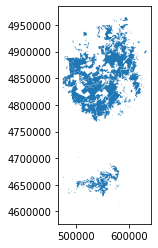

In [29]:
wild_lands.plot()

In [30]:
path1 = '/home/shihsir/Desktop/Codes/Geospatial/NY_county_boundaries/NY_county_boundaries/'
file1 = "NY_county_boundaries.shp"
counties = gpd.read_file(path1+file1)

In [31]:
path2 = '/home/shihsir/Desktop/Codes/Geospatial/DEC_roadstrails/DEC_roadstrails/'
file2 = 'Decroadstrails.shp'
roads_trails = gpd.read_file(path2+file2)

In [32]:
path3 = '/home/shihsir/Desktop/Codes/Geospatial/DEC_pointsinterest/DEC_pointsinterest/'
file3 = 'Decptsofinterest.shp'
POI_data = gpd.read_file(path3+file3)

In [33]:
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

In [34]:
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

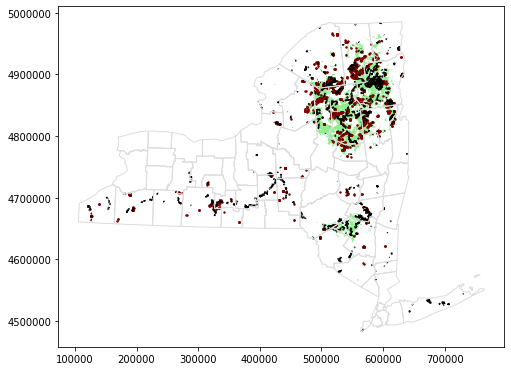

In [35]:
ax = counties.plot(figsize=(8,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)